**Problem Statement:**
The Audubon Society Field Guide to North American Mushrooms contains
descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms
in the Agaricus and Lepiota Family Mushroom (1981). Each species is labeled as
either definitely edible, definitely poisonous, or maybe edible but not recommended.
This last category was merged with the toxic category. The Guide asserts
unequivocally that there is no simple rule for judging a mushroom's edibility, such as
"leaflets three, leave it be" for Poisonous Oak and Ivy. The main goal is to predict
which mushroom is poisonous & which is edible.

**Approach:** 

The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

**Results:** 

You have to build a solution that should be able to predict which mushroom
is poisonous & which is edible.

**About Data:**

● Attribute Information: (classes: edible=e, poisonous=p)

● cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

● cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

● cap-color:

brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

● bruises: bruises=t,no=f.  

●odor:almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,
spicy=s

● gill-attachment: attached=a,descending=d,free=f,notched=n

● gill-spacing: close=c,crowded=w,distant=d

● gill-size: broad=b,narrow=n

● gill-color:black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p
,purple=u,red=e,white=w,yellow=y

● stalk-shape: enlarging=e,tapering=t

● stalk-root:bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

● stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

● stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

● stalk-color-above-ring:brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,re
d=e,white=w,yellow=y

● stalk-color-below-ring:
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

● veil-type: partial=p,universal=u

● veil-color: brown=n,orange=o,white=w,yellow=y

● ring-number: none=n,one=o,two=t

● ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheat
hing=s,zone=z

● spore-print-color:black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

●population:abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitar
y=y

● habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

#Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


In [ ]:
df= pd.read_csv("/content/mushrooms.csv")

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

We dont have any missing values in our data.


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
for i in df.columns:
    print("Unique values of",i,"are\t", df[i].unique())

Unique values of class are	 ['p' 'e']
Unique values of cap-shape are	 ['x' 'b' 's' 'f' 'k' 'c']
Unique values of cap-surface are	 ['s' 'y' 'f' 'g']
Unique values of cap-color are	 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values of bruises are	 ['t' 'f']
Unique values of odor are	 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values of gill-attachment are	 ['f' 'a']
Unique values of gill-spacing are	 ['c' 'w']
Unique values of gill-size are	 ['n' 'b']
Unique values of gill-color are	 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values of stalk-shape are	 ['e' 't']
Unique values of stalk-root are	 ['e' 'c' 'b' 'r' '?']
Unique values of stalk-surface-above-ring are	 ['s' 'f' 'k' 'y']
Unique values of stalk-surface-below-ring are	 ['s' 'f' 'y' 'k']
Unique values of stalk-color-above-ring are	 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values of stalk-color-below-ring are	 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values of veil-type are	 ['p']
Unique values of veil-

#Exploratory data analysis

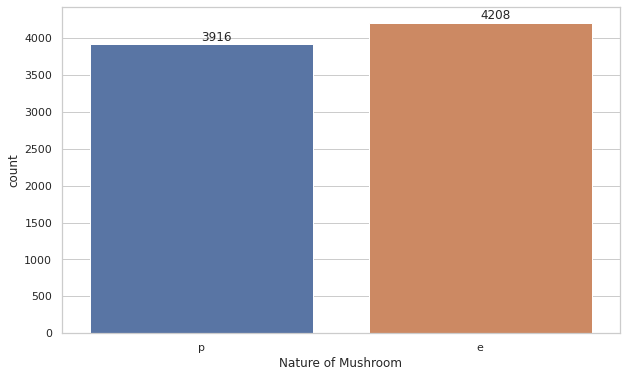

In [ ]:
#Class
plt.figure(figsize=(10,6))

ax = sns.countplot(x="class", data=df)

plt.xlabel("Nature of Mushroom", fontsize= 12)
plt.ylabel("count", fontsize= 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.4, p.get_height()+50))
#plt.savefig('count_plot.png',dpi=300)    
plt.show()

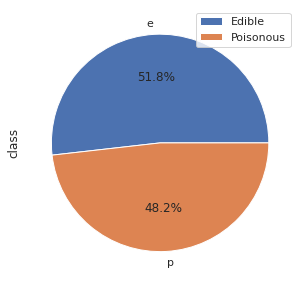

In [ ]:
plt.figure(figsize=(7,5))

df['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.legend(["Edible","Poisonous"])
plt.savefig('pie_chart_class',dpi=300)
plt.show()

We can see the data is almost balanced.

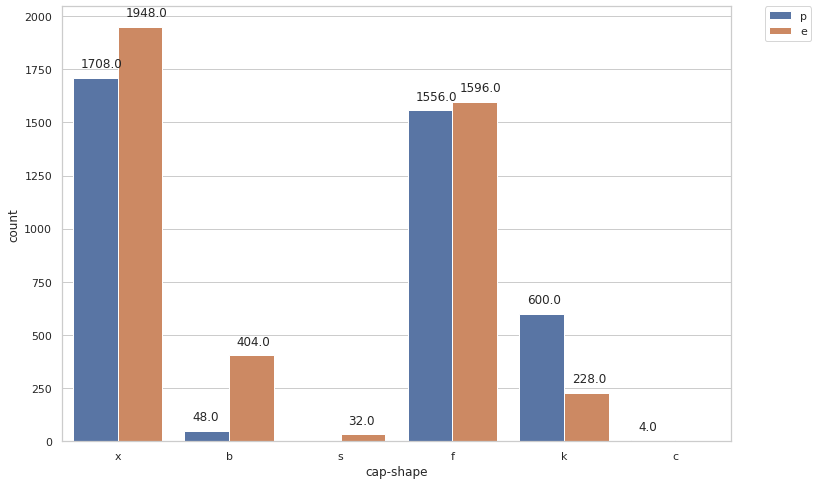

In [ ]:
#cap-shape
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'cap-shape', hue="class")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+50))

plt.show()

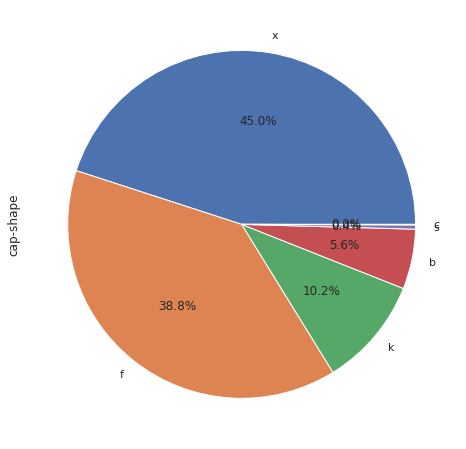

In [ ]:
plt.figure(figsize=(10,8))

df['cap-shape'].value_counts().plot(kind='pie',autopct='%1.1f%%')
#plt.legend(["Edible","Poisonous"])
#plt.savefig('cap_shape',dpi=300)
plt.show()

In [ ]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [ ]:
df.groupby('cap-shape')['class'].value_counts()

cap-shape  class
b          e         404
           p          48
c          p           4
f          e        1596
           p        1556
k          p         600
           e         228
s          e          32
x          e        1948
           p        1708
Name: class, dtype: int64

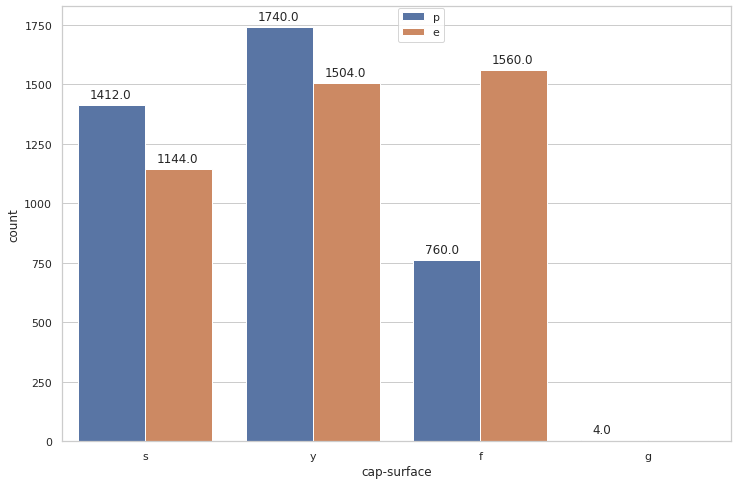

In [ ]:
#cap-surface

plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'cap-surface', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=0.1)
plt.show()

In [ ]:
df.groupby('cap-surface')['class'].value_counts()

cap-surface  class
f            e        1560
             p         760
g            p           4
s            p        1412
             e        1144
y            p        1740
             e        1504
Name: class, dtype: int64

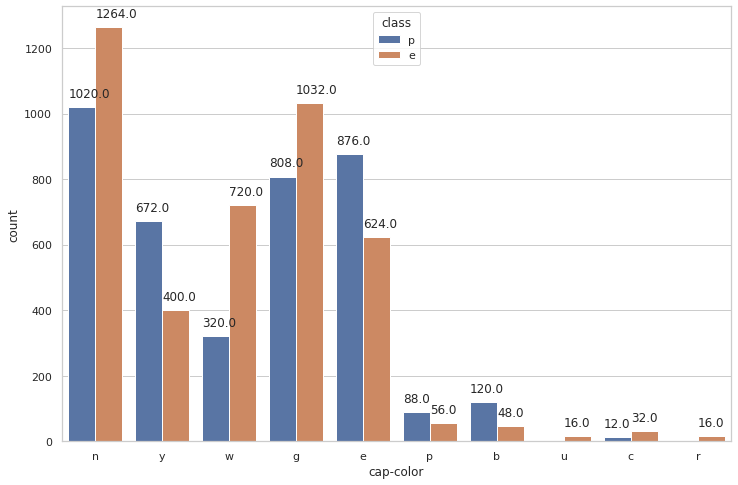

In [ ]:
#cap-color
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'cap-color', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x(), p.get_height()+30))

plt.show()


In [ ]:
df.groupby('cap-color')['class'].value_counts()

cap-color  class
b          p         120
           e          48
c          e          32
           p          12
e          p         876
           e         624
g          e        1032
           p         808
n          e        1264
           p        1020
p          p          88
           e          56
r          e          16
u          e          16
w          e         720
           p         320
y          p         672
           e         400
Name: class, dtype: int64

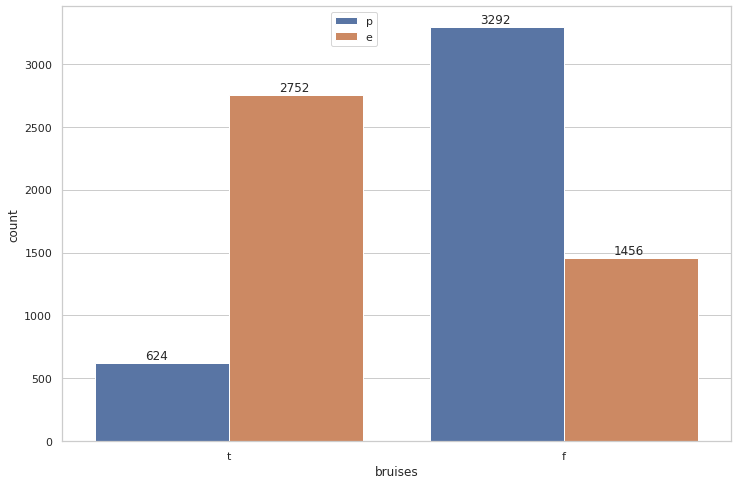

In [ ]:
#bruises
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'bruises', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.4, 0.99), loc=2, borderaxespad=0.1)
plt.show()

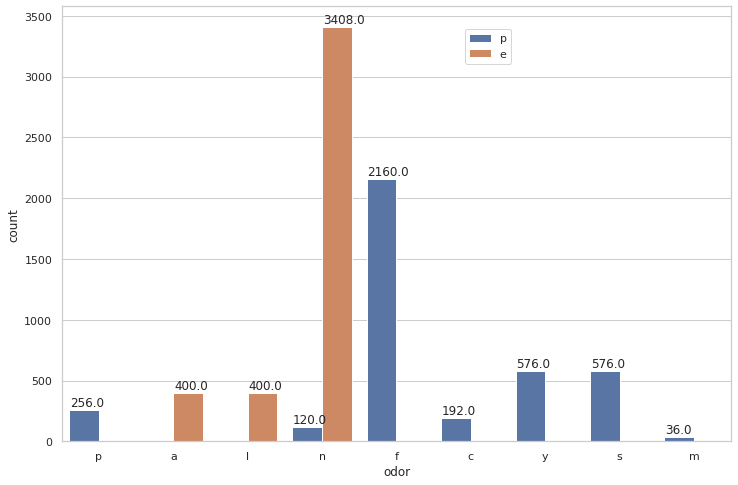

In [ ]:
#odor
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'odor', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.01, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.6, 0.95), loc=2, borderaxespad=0.1)
plt.show()


In [ ]:
df.groupby('odor')['class'].value_counts()

odor  class
a     e         400
c     p         192
f     p        2160
l     e         400
m     p          36
n     e        3408
      p         120
p     p         256
s     p         576
y     p         576
Name: class, dtype: int64

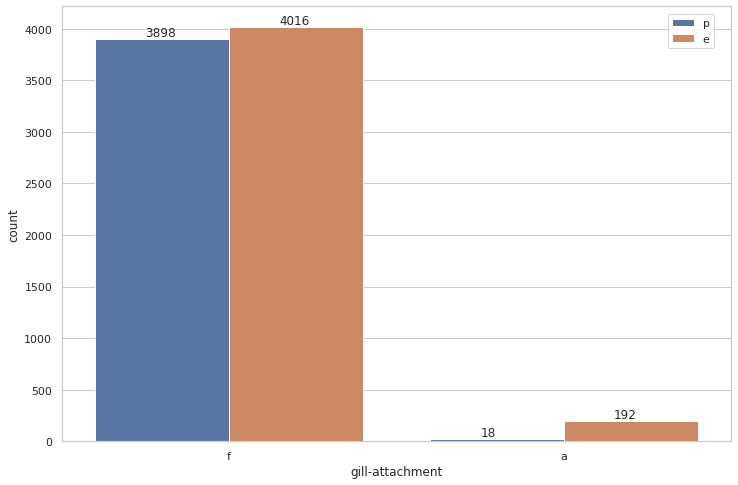

In [ ]:
#gill-attachment
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'gill-attachment', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

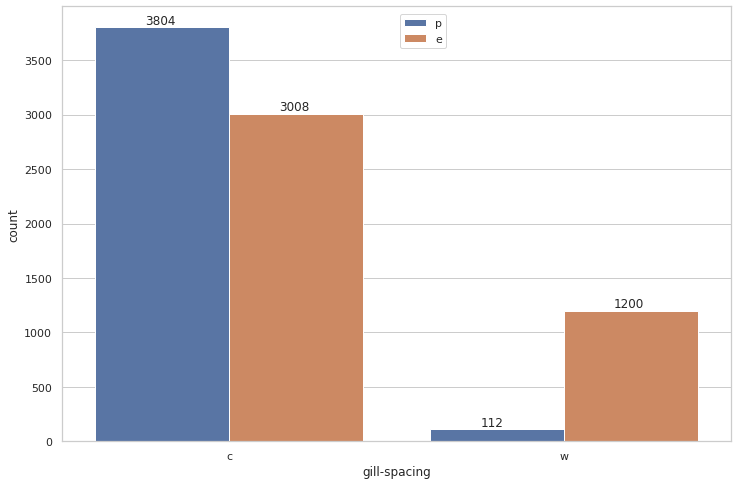

In [ ]:
#gill-spacing
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'gill-spacing', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.5, 0.99), loc=2, borderaxespad=0.3)
plt.show()

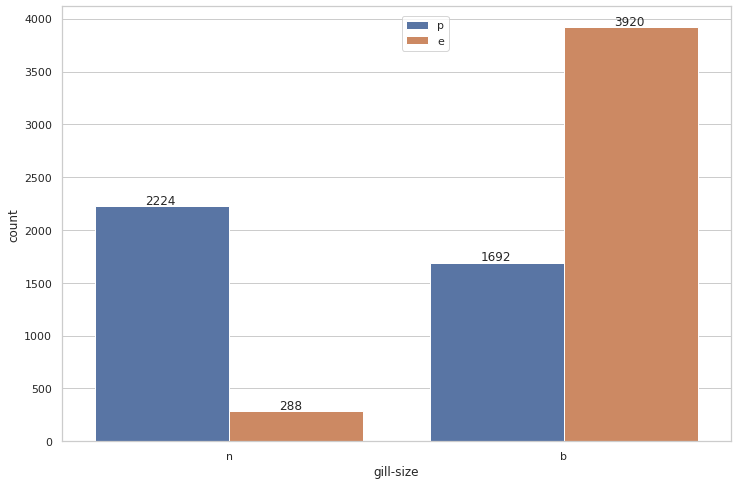

In [ ]:
#gill-size
plt.figure(figsize=(12,8))
ax = sns.countplot(data = df, x = 'gill-size', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+20))
plt.legend(bbox_to_anchor=(0.5, 0.99), loc=2, borderaxespad=0.5)
plt.show()

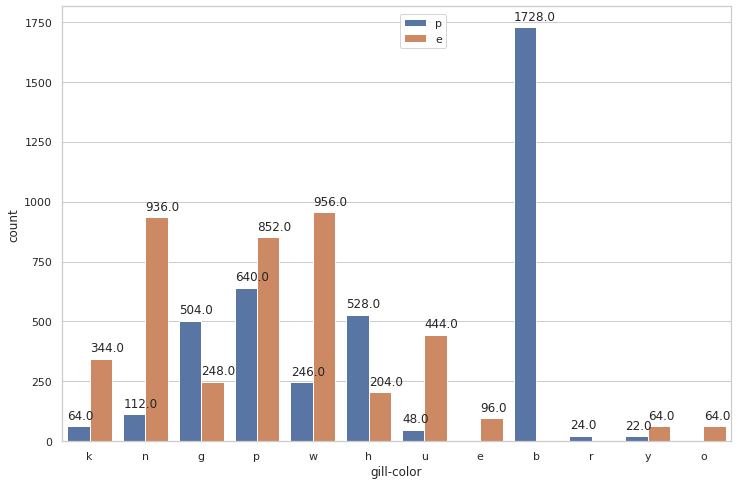

In [ ]:
#gill-color 
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'gill-color', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.005, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.5, 0.99), loc=2, borderaxespad=0.3)
plt.show()

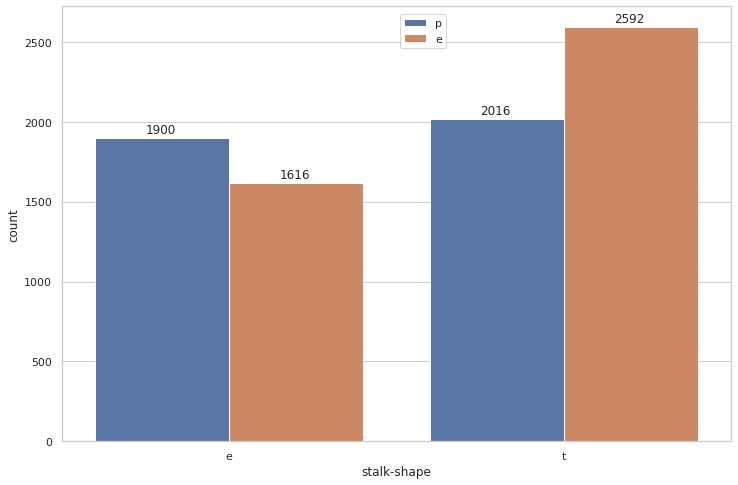

In [ ]:
#stalk-shape 
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'stalk-shape', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.5, 0.99), loc=2, borderaxespad=0.3)
plt.show()

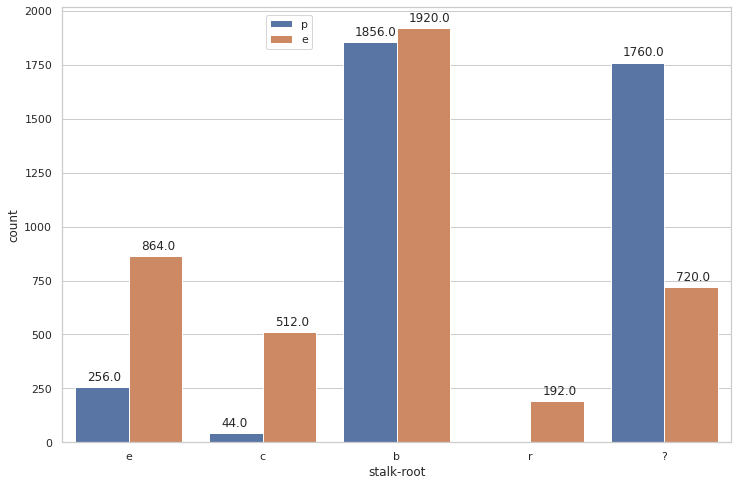

In [ ]:
#stalk-root 
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'stalk-root', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.09, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.3, 0.99), loc=2, borderaxespad=0.3)
plt.show()

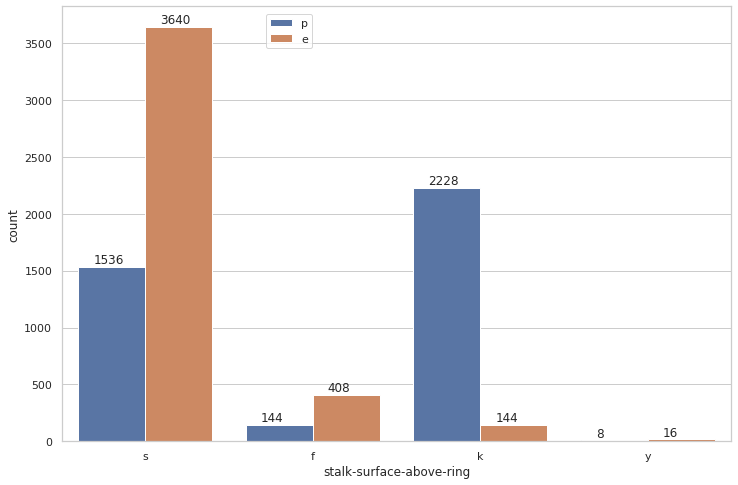

In [ ]:
#stalk-surface-above-ring  
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'stalk-surface-above-ring', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.09, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.3, 0.99), loc=2, borderaxespad=0.3)
plt.show()

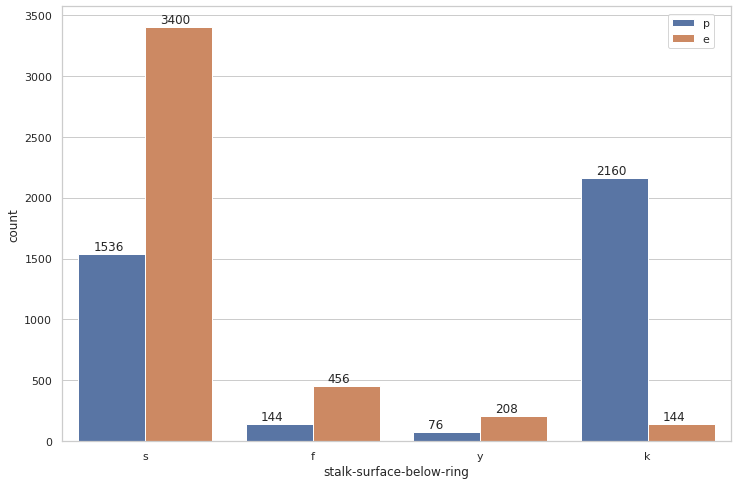

In [ ]:
#stalk-surface-below-ring
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'stalk-surface-below-ring', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.09, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

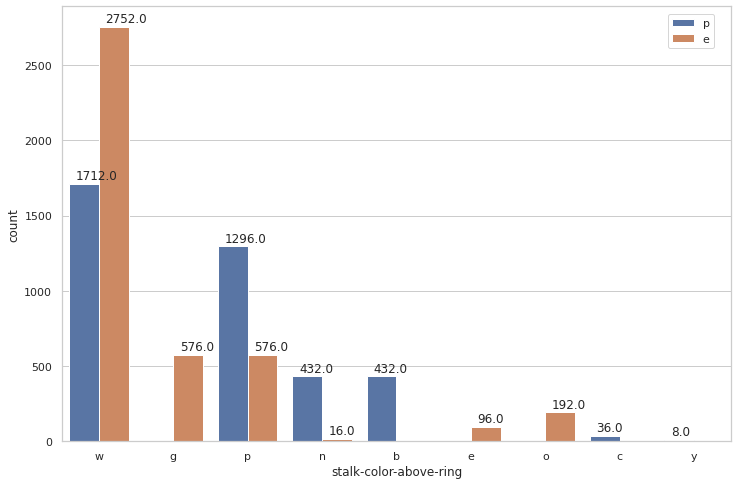

In [ ]:
#stalk-color-above-ring
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'stalk-color-above-ring', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.09, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

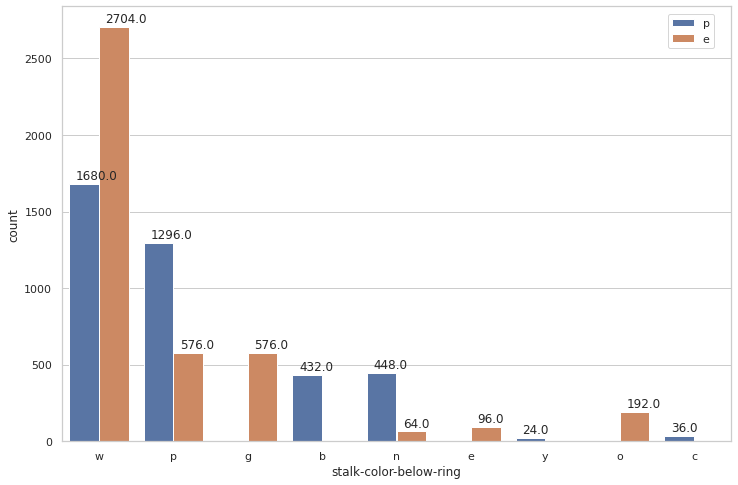

In [ ]:
#stalk-color-below-ring
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'stalk-color-below-ring', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.09, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

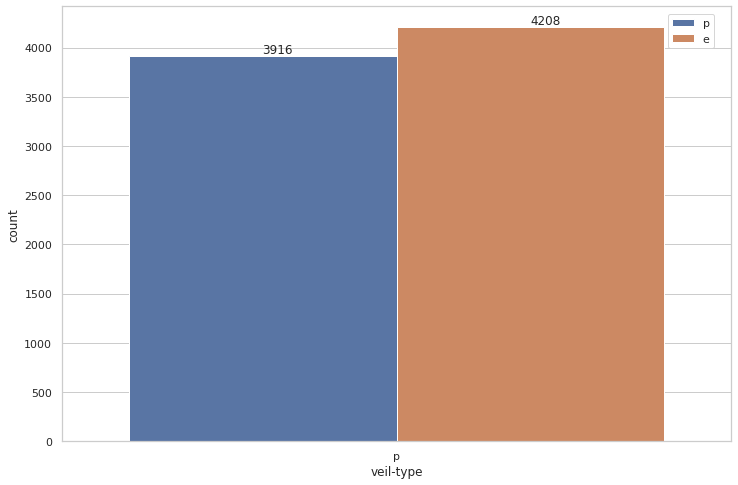

In [ ]:
#veil-type
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'veil-type', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

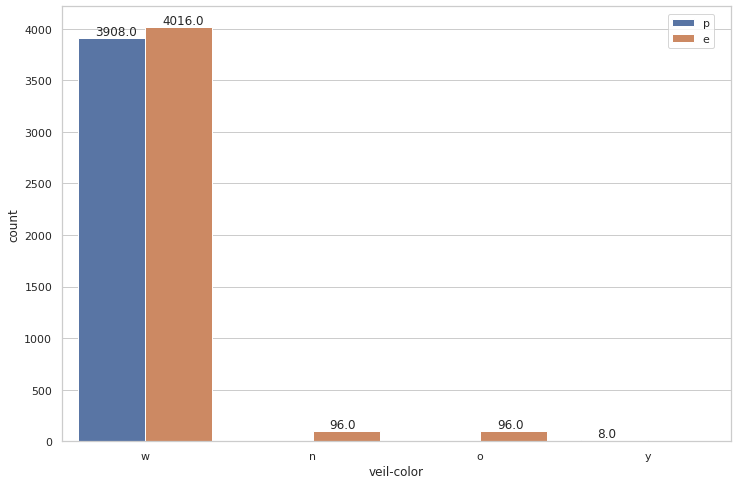

In [ ]:
#veil-color
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'veil-color', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

In [ ]:
df.groupby("veil-color")["class"].value_counts()

veil-color  class
n           e          96
o           e          96
w           e        4016
            p        3908
y           p           8
Name: class, dtype: int64

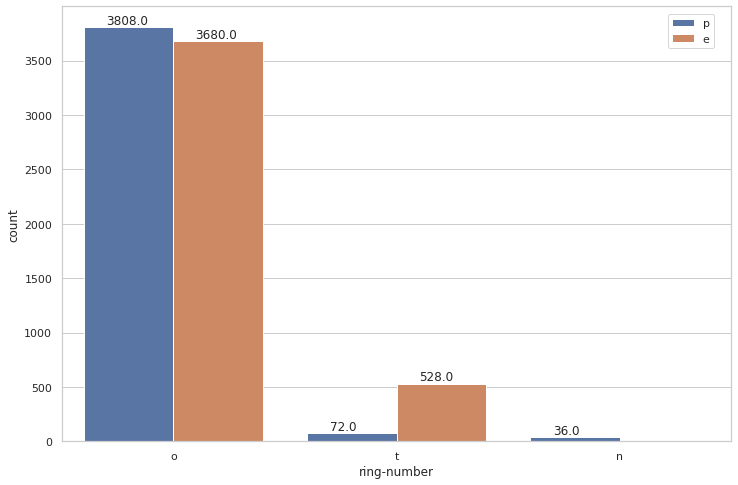

In [ ]:
#ring-number
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'ring-number', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

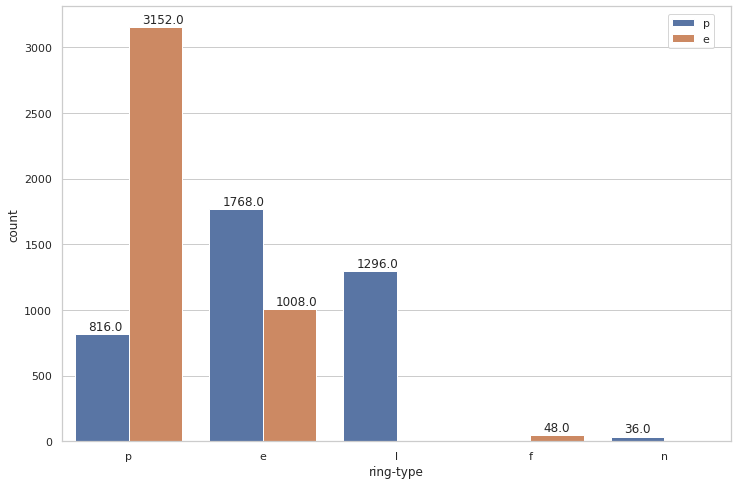

In [ ]:
#ring-type
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'ring-type', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

In [ ]:
df.groupby("ring-type")["class"].value_counts()

ring-type  class
e          p        1768
           e        1008
f          e          48
l          p        1296
n          p          36
p          e        3152
           p         816
Name: class, dtype: int64

In [ ]:
#spore-print-color
df.groupby("spore-print-color")["class"].value_counts()

spore-print-color  class
b                  e          48
h                  p        1584
                   e          48
k                  e        1648
                   p         224
n                  e        1744
                   p         224
o                  e          48
r                  p          72
u                  e          48
w                  p        1812
                   e         576
y                  e          48
Name: class, dtype: int64

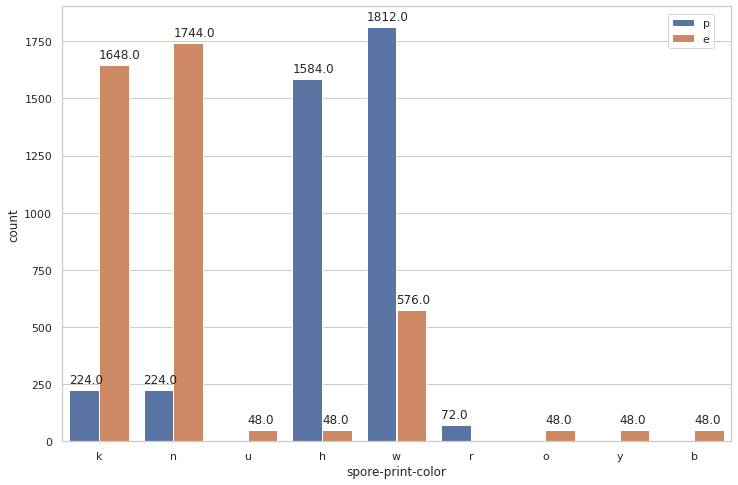

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'spore-print-color', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x(), p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

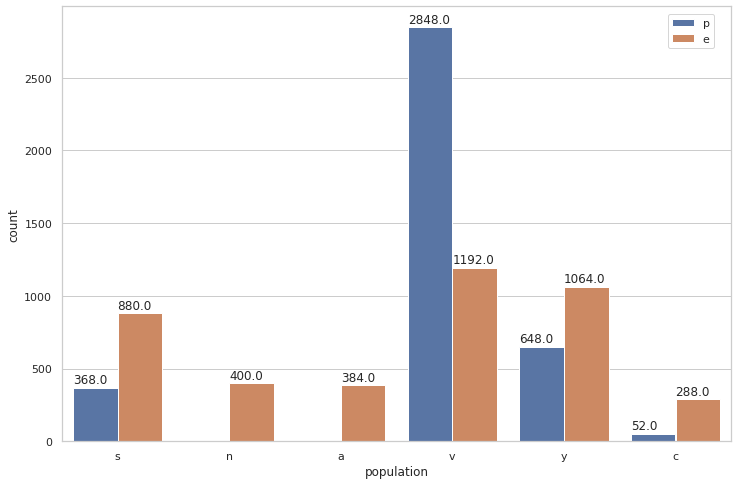

In [ ]:
#population
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'population', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x(), p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()

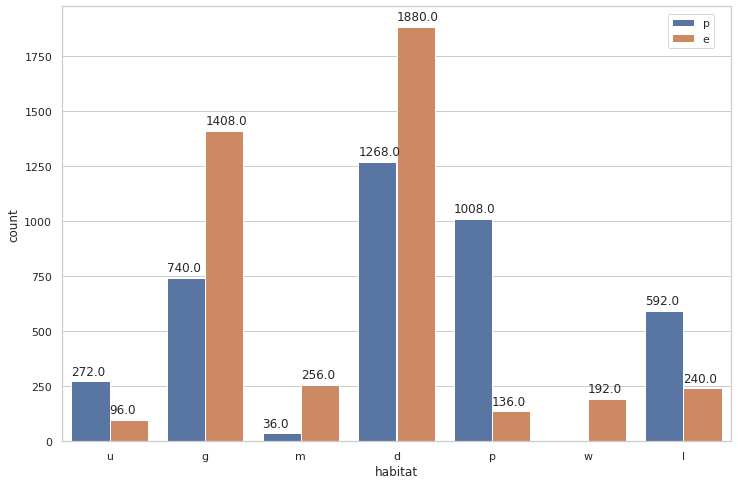

In [ ]:
#habitat
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df, x = 'habitat', hue="class")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x(), p.get_height()+30))
plt.legend(bbox_to_anchor=(0.9, 0.99), loc=2, borderaxespad=0.3)
plt.show()